In [13]:
import pandas as pd
import numpy as np
car_sales = pd.read_csv('../data/car-sales-extended.csv')

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [14]:
len(car_sales)

1000

# Separate data into X and y

In [15]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split data into training and test sets


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build machine learning model


In [17]:
'''
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor ia different from RandomForestClassifier since it can predict a number
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test) 

'''

# This returns ValueError since since Make and Colour columns are not numbers, which are required by random forest regressor

'\nfrom sklearn.ensemble import RandomForestRegressor # RandomForestRegressor ia different from RandomForestClassifier since it can predict a number\nmodel = RandomForestRegressor()\nmodel.fit(X_train, y_train)\nmodel.score(X_test, y_test) \n\n'

# Turn the categories into numbers


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Adding "Doors" since "Doors" is also representing a category of Cars
categorical_features = ["Make", "Colour", "Doors"]

''' 
OneHotEncoder() converts categorical data into a binary format.
Key points:
Creates new binary columns for each unique category
Each row has exactly one '1' and the rest are '0's '''

one_hot = OneHotEncoder()

transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X



array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [19]:
# Converting transformed_X to pandas dataframe
pd.DataFrame(transformed_X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


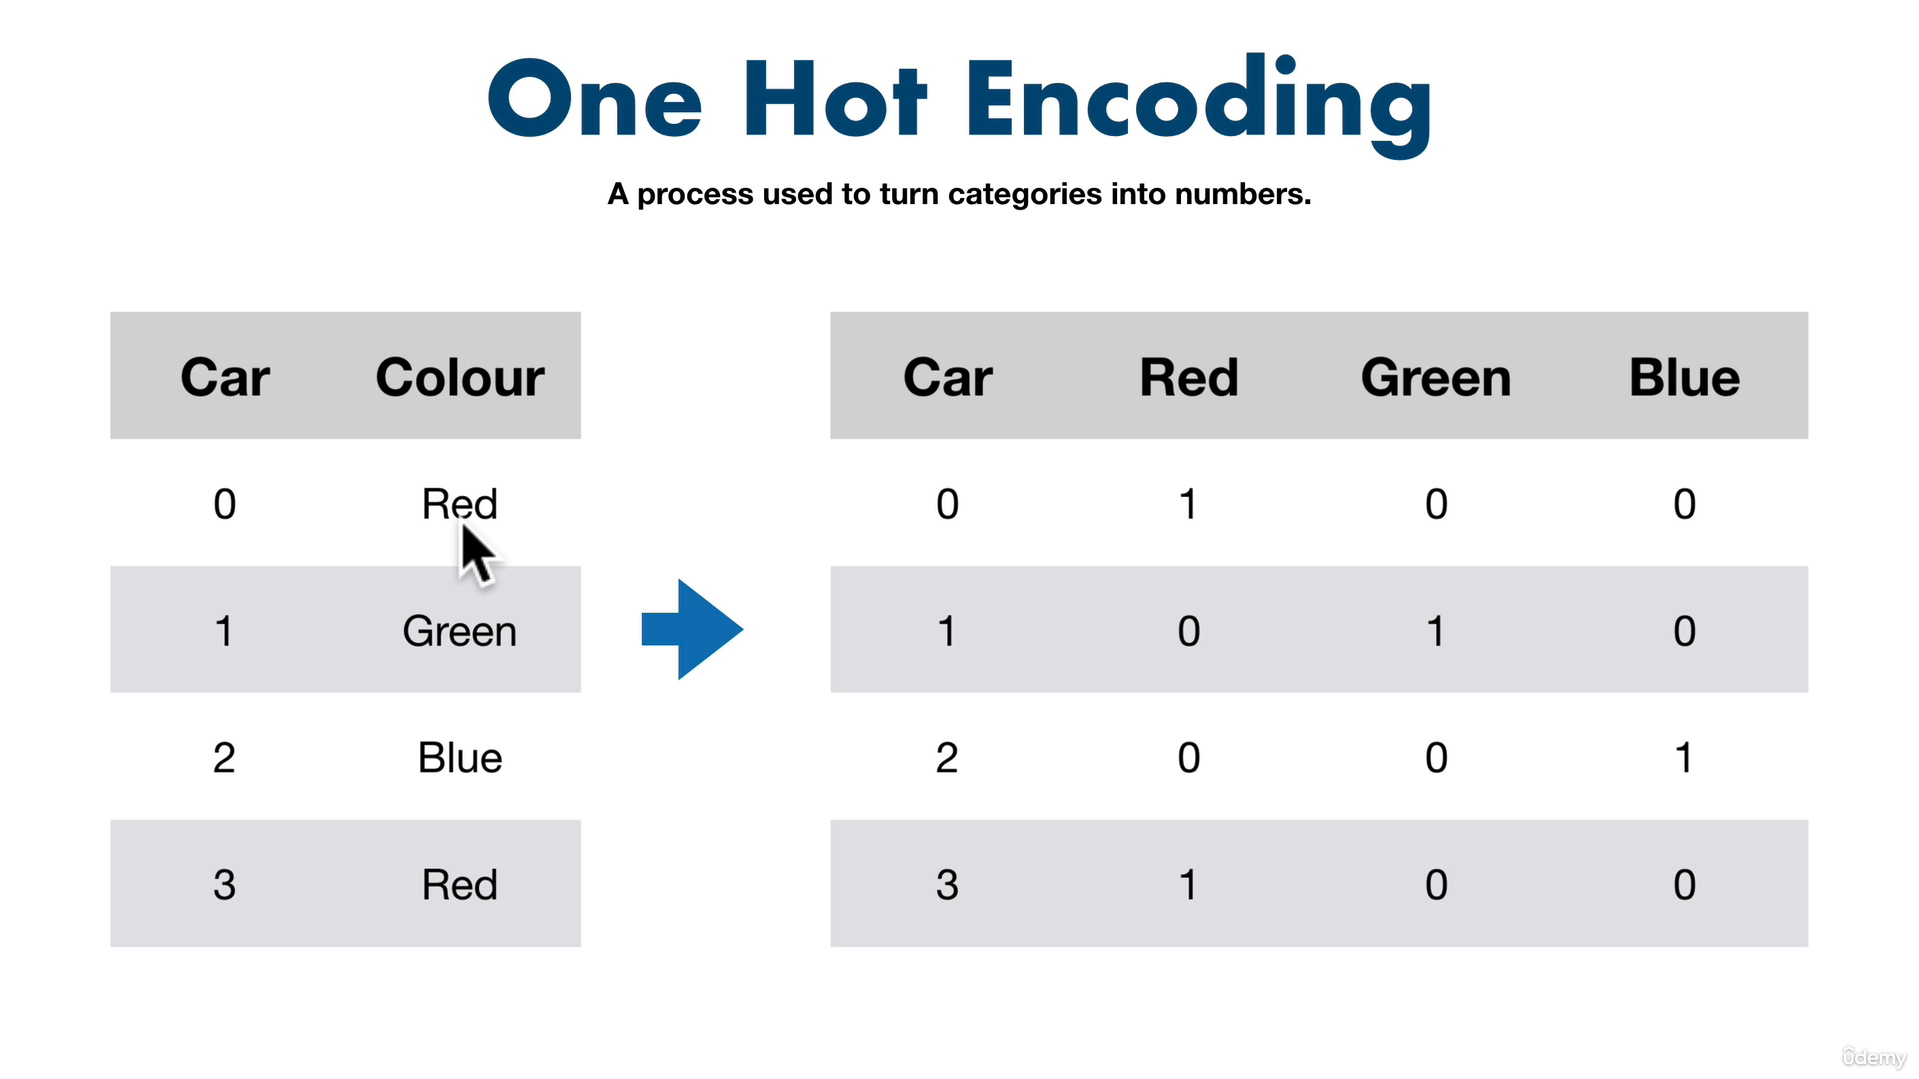

# Alternative to OneHotEncoding    

In [20]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


# Let's refit the model


In [23]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor ia different from RandomForestClassifier since it can predict a number
model = RandomForestRegressor()

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test) 


0.3235867221569877